In [1]:
from graph_description.datasets import get_knecht_data
import networkx as nx
import pysubgroup as ps
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [2]:
arr, df = get_knecht_data(wave=2)
G = nx.from_numpy_array(arr, create_using=nx.DiGraph)

In [3]:
searchspace = ps.create_selectors(df, ignore=['sex', 'identifier'])

In [4]:
searchspace

[ethnicity=='Dutch',
 ethnicity=='non-Dutch',
 ethnicity.isnull(),
 father_religion=='non-religious',
 father_religion=='other religion',
 father_religion.isnull(),
 father_religion=='Christian',
 alcohol=='never',
 alcohol=='2-4 times',
 alcohol=='5-10 times',
 alcohol=='once',
 alcohol.isnull(),
 delinquency=='once',
 delinquency=='never',
 delinquency.isnull(),
 delinquency=='2-4 times',
 age==11,
 age==12,
 age==13,
 advice.isnull(),
 advice==4.0,
 advice==5.0,
 advice==6.0,
 advice==7.0,
 advice==8.0]

In [5]:
from graph_description.networkx_aggregation import SumAggregator, MeanAggregator, apply_aggregator    

In [6]:
df1, searchspace1 = apply_aggregator(SumAggregator, df, G, searchspace)
df2, searchspace2 = apply_aggregator((SumAggregator, MeanAggregator), df1, G)

In [7]:
total_df = pd.concat([df, df1, df2], axis=1)
total_searchspace = searchspace+searchspace1+searchspace2

In [8]:
target = ps.BinaryTarget ('sex', "female")

In [9]:
task = ps.SubgroupDiscoveryTask (
    total_df,
    target,
    total_searchspace,
    result_set_size=20,
    depth=5,
    qf=ps.GeneralizationAware_StandardQF(0.5))
algorithm = ps.Apriori()
algorithm.use_vectorization=False
result = algorithm.execute(task)

C:\Users\felix\Desktop\projects\pysubgroup\src\pysubgroup\binary_target.py:546: RuntimeWarning: invalid value encountered in scalar divide
  tau_diff = pos / (pos + delta_n)


In [10]:
result.to_dataframe()

,quality,subgroup,size_sg,size_dataset,positives_sg,positives_dataset,size_complement,relative_size_sg,relative_size_complement,coverage_sg,coverage_complement,target_share_sg,target_share_complement,target_share_dataset,lift
0,0.176363,neigh_sum(age==11)==1.0,6,25,6,16,19,0.24,0.76,0.3750,0.6250,1.000000,0.526316,0.64,1.562500
1,0.176363,neigh_mean(neigh_sum(age==11))>=0.71,6,25,6,16,19,0.24,0.76,0.3750,0.6250,1.000000,0.526316,0.64,1.562500
2,0.160997,neigh_sum(neigh_sum(father_religion=='other religion')): [4.0:8.0[,5,25,5,16,20,0.20,0.80,0.3125,0.6875,1.000000,0.550000,0.64,1.562500
3,0.160997,neigh_sum(neigh_sum(delinquency.isnull()))==1.0,5,25,5,16,20,0.20,0.80,0.3125,0.6875,1.000000,0.550000,0.64,1.562500
4,0.160997,neigh_sum(neigh_sum(alcohol=='never'))<4.0,5,25,5,16,20,0.20,0.80,0.3125,0.6875,1.000000,0.550000,0.64,1.562500
5,0.160997,neigh_sum(neigh_sum(alcohol.isnull()))==1.0,5,25,5,16,20,0.20,0.80,0.3125,0.6875,1.000000,0.550000,0.64,1.562500
6,0.160997,neigh_sum(neigh_sum(age==11)): [2.0:5.0[,5,25,5,16,20,0.20,0.80,0.3125,0.6875,1.000000,0.550000,0.64,1.562500
7,0.160997,neigh_sum(father_religion=='non-religious')<1.0,5,25,5,16,20,0.20,0.80,0.3125,0.6875,1.000000,0.550000,0.64,1.562500
8,0.160997,neigh_sum(delinquency=='never'): [3.0:4.0[,5,25,5,16,20,0.20,0.80,0.3125,0.6875,1.000000,0.550000,0.64,1.562500
9,0.160997,neigh_mean(neigh_sum(father_religion=='Christian')): [1.09:1.38[,5,25,5,16,20,0.20,0.80,0.3125,0.6875,1.000000,0.550000,0.64,1.562500


In [11]:
from pysubgroup.visualization import supportSetVisualization
import matplotlib.pyplot as plt

Discarding 8 entities that are not covered


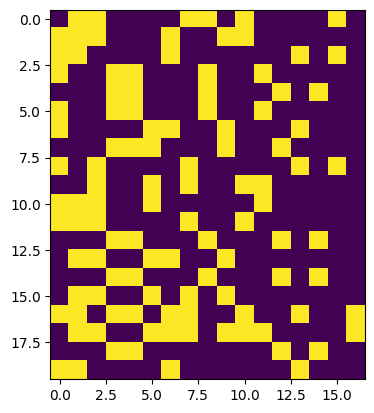

In [12]:
plt.imshow(supportSetVisualization(result))